___
### IMPORTS

In [71]:
# Modules used for data handling / test
import pickle


# Modules used for EDA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Modules used for ML
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [72]:
# Modules settings
%matplotlib inline

sns.set_theme(style='whitegrid', rc={'figure.figsize': (20, 10)})

In [73]:
### TODO ### Import a class from a module

# For a better pd.DataFrame visualization
class display(object):
    '''This class was found in 'Python Data Science Handbook' by jakevdp (Jake Vanderplas),
    which you can access though his GitHub repository
    (https://github.com/jakevdp/PythonDataScienceHandbook)'''
    
    template = '''<div style="float: left; padding: 10px;">
                  <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
                  </div>'''
    
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_()) for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a)) for a in self.args)

___
### UPDATE UTILS

In [74]:
# This cell only needs to be executed to update utils
# if modified after been imported

%run utils

___
### GETTING DATASET

I'll be working with big_museum.

In [75]:
museum = pd.read_csv('./data/big_museum_clean.csv', index_col='Unnamed: 0')

In [76]:
museum.columns

Index(['img_ID', 'artist', 'height', 'width', 'whitespace', 'chiaroscuro',
       'color_01', 'color_02', 'color_03', 'color_04', 'color_05', 'color_06',
       'color_07', 'color_08', 'color_09', 'color_10'],
      dtype='object')

In [77]:
museum[museum['artist'] == 'sorolla']

img_ID   artist  height  width  whitespace  chiaroscuro  \
4327               251124  sorolla     500    351     0.19943      0.02346   
4328               251108  sorolla     500    904     0.19978      0.23065   
4329  9223372032559865553  sorolla     500    745     0.19973      0.02606   
4330               251106  sorolla     500    406     0.19951      0.00431   
4331               251163  sorolla     500    765     0.20000      0.06677   
...                   ...      ...     ...    ...         ...          ...   
4686               251425  sorolla     500    690     0.19971      0.54639   
4687               251426  sorolla     500    315     0.19937      0.03499   
4688               251427  sorolla     500    756     0.19974      0.01028   
4689               251428  sorolla     500    732     0.19973      0.01123   
4690               251429  sorolla     500    641     0.19969      0.05091   

     color_01 color_02 color_03 color_04 color_05 color_06 color_07 color_08  \
4327  #FF7F00  #003F00  #3F3F3F  #7F7F00  #FFFF7F  #000000  #3F3F00  #BF0000   
4328  #BF7FBF  #000000  #BF3F00  #FFFFBF  #FFBFBF  #7FBF3F  #3F3F00  #7F3F3F   
4329  #7F7F7F  #BFFFFF  #7F7FBF  #000000  #3F3F3F  #BF7F3F  #7F3F00  #3F003F   
4330  #3F0000  #FFFFBF  #BF3F00  #7F7F3F  #FFFFFF  #3F3F00  #003F00  #BF7F3F   
4331  #7F3F00  #BF7FBF  #FFBFBF  #BF7F3F  #003F00  #003F00  #3F7F3F  #FFFFFF   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4686  #BFBF3F  #000000  #BFBFBF  #7F7FBF  #FFFFFF  #7F3F3F  #3F003F  #7F3F3F   
4687  #3F3F00  #FFFFFF  #3F0000  #BF7F3F  #BF7F7F  #FFBF00  #000000  #BFBF00   
4688  #3F0000  #BF7F3F  #7F3F00  #3F0000  #BF7F3F  #FFBF3F  #003F3F  #BFBF7F   
4689  #00003F  #7F7F7F  #000000  #7F3F3F  #FFFFBF  #3F3F00  #BF7F00  #FF7F3F   
4690  #3F7FBF  #FFBF7F  #00003F  #000000  #3F00BF  #7F3F00  #3F003F  #FFFFFF   

     color_09 color_10  
4327  #BF7F7F  #3F3F3F  
4328  #BF7F3F  #FFBF3F  
4329  #BFBF7F  #FFFFFF  
4330  #3F3F00  #BF7F7F  
4331  #BFBF3F  #7F003F  
...       ...      ...  
4686  #FF7F7F  #FFBFFF  
4687  #FFBF7F  #BF3F3F  
4688  #FF3F00  #3F7F3F  
4689  #3F3F00  #7F3F00  
4690  #FFBF3F  #3F3FBF  

[350 rows x 16 columns]

___
### BASIC EDA

The height column doesn't give any information, but the ratio data may work. Let's clean up!

In [78]:
museum['ratio'] = museum['height'] / museum['width']
museum.drop(labels='height', axis=1, inplace=True)

museum.head()

img_ID      artist  width  whitespace  chiaroscuro color_01  \
0  9223372032559824886  caravaggio    423     0.19953      0.00330  #7F0000   
1               186636  caravaggio    479     0.19958      0.00583  #3F7F3F   
2               186724  caravaggio    338     0.19941      0.00688  #000000   
3               186639  caravaggio    694     0.19971      0.01194  #3F003F   
4               186671  caravaggio    657     0.19970      0.00837  #3F003F   

  color_02 color_03 color_04 color_05 color_06 color_07 color_08 color_09  \
0  #FFBF7F  #3F0000  #7F7F3F  #003F3F  #BF3F00  #BFBFBF  #FFFFFF  #FFBF3F   
1  #000000  #FFBFBF  #3F3F00  #FFFFFF  #00003F  #7F0000  #BF7F3F  #BFBF7F   
2  #BFBFBF  #3F3F3F  #FFFFFF  #7F7F7F  #3F3F00  #FFFFBF  #7F3F00  #BF7F3F   
3  #BF7F3F  #003F3F  #FFBF7F  #003F00  #BF7F00  #3F7F3F  #3F3F00  #7F3F00   
4  #7F3F00  #FF7F3F  #3F003F  #7F0000  #FFBFBF  #000000  #7F3F3F  #7F7F7F   

  color_10     ratio  
0  #000000  1.182033  
1  #3F0000  1.043841  
2  #000000  1.479290  
3  #7F3F00  0.720461  
4  #003F3F  0.761035

___
### FEATURE ENGINEERING

Another valious information is the *'school'* or style of the artist. Some artists practiced several styles but I'll just use the most significant and reduce it to two groups: classics and vanguards.

| Artist                 | Movement                    | Group
| :---                   | :---                        | :---
| Caravaggio             | Baroque                     | Classic
| Edgar Degas            | Impressionism               | Classic
| Francisco de Goya      | Romanticism                 | Classic
| Katsushika Hokusai     | Ukiyo-e                     | Classic
| Frida Kahlo            | Surrealism                  | Vanguards
| Wassily Kandinsky      | Expressionism               | Classic
| Gustav Klimt           | Art Nouveau                 | Vanguards
| Roy Lichtenstein       | Pop Art                     | Vanguards
| Piet Mondrian          | De Stijl                    | Vanguards
| Claude Monet           | Impressionism               | Classic
| Pablo Picasso          | Cubism                      | Vanguards
| Jackson Pollock        | Abstract Expressionism      | Vanguards
| Joaquín Sorolla        | Impressionism               | Classic
| Diego Velazquez        | Baroque                     | Classic
| Andy Warhol            | Pop Art                     | Vanguards

In [79]:
vanguards = ['kahlo', 'klimt', 'lichtenstein', 'mondrian',
             'picasso', 'pollock', 'warhol']

museum['group'] = 0
museum.loc[museum['artist'].isin(vanguards), 'group'] = 1

In [80]:
museum.head()

img_ID      artist  width  whitespace  chiaroscuro color_01  \
0  9223372032559824886  caravaggio    423     0.19953      0.00330  #7F0000   
1               186636  caravaggio    479     0.19958      0.00583  #3F7F3F   
2               186724  caravaggio    338     0.19941      0.00688  #000000   
3               186639  caravaggio    694     0.19971      0.01194  #3F003F   
4               186671  caravaggio    657     0.19970      0.00837  #3F003F   

  color_02 color_03 color_04 color_05 color_06 color_07 color_08 color_09  \
0  #FFBF7F  #3F0000  #7F7F3F  #003F3F  #BF3F00  #BFBFBF  #FFFFFF  #FFBF3F   
1  #000000  #FFBFBF  #3F3F00  #FFFFFF  #00003F  #7F0000  #BF7F3F  #BFBF7F   
2  #BFBFBF  #3F3F3F  #FFFFFF  #7F7F7F  #3F3F00  #FFFFBF  #7F3F00  #BF7F3F   
3  #BF7F3F  #003F3F  #FFBF7F  #003F00  #BF7F00  #3F7F3F  #3F3F00  #7F3F00   
4  #7F3F00  #FF7F3F  #3F003F  #7F0000  #FFBFBF  #000000  #7F3F3F  #7F7F7F   

  color_10     ratio  group  
0  #000000  1.182033      0  
1  #3F0000  1.043841      0  
2  #000000  1.479290      0  
3  #7F3F00  0.720461      0  
4  #003F3F  0.761035      0

___

The color columns are coded in HEX notation and are object types elements. I'll use a label encoder to transform them.

In [81]:
museum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4283 entries, 0 to 5014
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   img_ID       4283 non-null   int64  
 1   artist       4283 non-null   object 
 2   width        4283 non-null   int64  
 3   whitespace   4283 non-null   float64
 4   chiaroscuro  4283 non-null   float64
 5   color_01     4283 non-null   object 
 6   color_02     4283 non-null   object 
 7   color_03     4283 non-null   object 
 8   color_04     4283 non-null   object 
 9   color_05     4283 non-null   object 
 10  color_06     4283 non-null   object 
 11  color_07     4283 non-null   object 
 12  color_08     4283 non-null   object 
 13  color_09     4283 non-null   object 
 14  color_10     4283 non-null   object 
 15  ratio        4283 non-null   float64
 16  group        4283 non-null   int64  
dtypes: float64(3), int64(3), object(11)
memory usage: 602.3+ KB


In [82]:
# Find unique colors in the ten colors columns
unique_colors = []

for i in range(5,15):
    for j in museum.iloc[:, i].unique():
        if j in unique_colors: continue
        else: unique_colors.append(j)

# Count colors found
print(len(unique_colors))

113


In [83]:
# Turn unique_colors in a 1D np.array
unique_colors = np.array(unique_colors).astype('object')

unique_colors

array(['#7F0000', '#3F7F3F', '#000000', '#3F003F', '#3F0000', '#FFBF3F',
       '#00003F', '#BF7F7F', '#FFFFFF', '#BFFFFF', '#003F00', '#BF7F00',
       '#3F3F00', '#FFBFBF', '#FFBF7F', '#FF7F3F', '#BF3F00', '#3F3F3F',
       '#003F3F', '#BFBF7F', '#7F3F3F', '#7FBFBF', '#7F3F00', '#FF7F00',
       '#7F7F3F', '#3F7F7F', '#7F7F7F', '#FFBF00', '#BF3F3F', '#FFFF7F',
       '#3F7F00', '#BF7F3F', '#7F3F7F', '#BF7FBF', '#BFFFBF', '#BFBFFF',
       '#003F7F', '#7F003F', '#FFFFBF', '#BF003F', '#BFBF3F', '#BFBFBF',
       '#3F3F7F', '#BF0000', '#3FBF7F', '#7F7F00', '#7F7FBF', '#FFFF3F',
       '#7FBF7F', '#FF7F7F', '#7FBF3F', '#BF3F7F', '#FF3F00', '#FF3F3F',
       '#FF3F7F', '#7FBFFF', '#3F7FBF', '#00007F', '#3FFFFF', '#007F3F',
       '#BFBF00', '#FFBFFF', '#BFFF7F', '#3F007F', '#007F7F', '#003FBF',
       '#FF0000', '#FF7FBF', '#3F7FFF', '#007F00', '#0000BF', '#FFFF00',
       '#BF7FFF', '#7F7FFF', '#3FBFBF', '#BFFF3F', '#7F3FBF', '#7FFFBF',
       '#7FFFFF', '#007FBF', '#7F007F', '#3F3FBF', 

In [84]:
# Instance, fit & transform label encoder
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(unique_colors)
label_encoder.transform(label_encoder.classes_)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112])

In [85]:
# Transform features (label encoder)
col_names = ['color_01', 'color_02', 'color_03', 'color_04', 'color_05',
             'color_06', 'color_07', 'color_08', 'color_09', 'color_10']

encoded_col_names = ['c01', 'c02', 'c03', 'c04', 'c05',
                     'c06', 'c07', 'c08', 'c09', 'c10']

for col_name, encoded_col_name in zip(col_names, encoded_col_names):
    museum[encoded_col_name] = label_encoder.transform(museum[col_name])

# Drop colums with HEX values
museum.drop(labels=col_names, axis=1, inplace=True)

# Show result
museum

img_ID      artist  width  whitespace  chiaroscuro  \
0     9223372032559824886  caravaggio    423     0.19953      0.00330   
1                  186636  caravaggio    479     0.19958      0.00583   
2                  186724  caravaggio    338     0.19941      0.00688   
3                  186639  caravaggio    694     0.19971      0.01194   
4                  186671  caravaggio    657     0.19970      0.00837   
...                   ...         ...    ...         ...          ...   
5010               229373      warhol    484     0.20000      0.48207   
5011               229381      warhol    666     0.19970      0.24422   
5012               229388      warhol    500     0.19960      0.02352   
5013               229396      warhol    340     0.19941      0.03930   
5014               229403      warhol    378     0.19947      0.01248   

         ratio  group  c01  c02  c03  c04  c05  c06  c07  c08  c09  c10  
0     1.182033      0   44  105   21   54    6   70   82  112  104    0  
1     1.043841      0   32    0  106   26  112    1   44   75   81   21  
2     1.479290      0    0   82   27  112   55   26  111   48   75    0  
3     0.720461      0   22   75    6  105    5   74   32   26   48   48  
4     0.761035      0   22   48   99   22   44  106    0   49   55    6  
...        ...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
5010  1.033058      1   56   48  111   28    0  104  112   80   66   71  
5011  0.750751      1   29    0   71    7   26   68   13   35    8    6  
5012  1.000000      1   21   88   50  112  104   43    0   61   27   20  
5013  1.470588      1   94  112    6   54   94   44   26   26   89  106  
5014  1.322751      1    0  109   75   82   22   49   54    6   99   22  

[4283 rows x 17 columns]

Similar case with target artist

In [86]:
museum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4283 entries, 0 to 5014
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   img_ID       4283 non-null   int64  
 1   artist       4283 non-null   object 
 2   width        4283 non-null   int64  
 3   whitespace   4283 non-null   float64
 4   chiaroscuro  4283 non-null   float64
 5   ratio        4283 non-null   float64
 6   group        4283 non-null   int64  
 7   c01          4283 non-null   int64  
 8   c02          4283 non-null   int64  
 9   c03          4283 non-null   int64  
 10  c04          4283 non-null   int64  
 11  c05          4283 non-null   int64  
 12  c06          4283 non-null   int64  
 13  c07          4283 non-null   int64  
 14  c08          4283 non-null   int64  
 15  c09          4283 non-null   int64  
 16  c10          4283 non-null   int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 602.3+ KB


In [87]:
# Find unique artist
unique_artist = museum['artist'].unique()

# Count artist found
print(len(unique_artist))

15


In [88]:
# Turn unique_artists in a 1D np.array
unique_artist = np.array(unique_artist).astype('object')

unique_artist

array(['caravaggio', 'degas', 'goya', 'hokusai', 'kahlo', 'kandinsky',
       'klimt', 'lichtenstein', 'mondrian', 'monet', 'picasso', 'pollock',
       'sorolla', 'velazquez', 'warhol'], dtype=object)

In [89]:
# Instance, fit & transform label encoder
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(unique_artist)
label_encoder.transform(label_encoder.classes_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [90]:
# Transform features (label encoder)
col_names = ['artist']

encoded_col_names = ['artist_enc']

for col_name, encoded_col_name in zip(col_names, encoded_col_names):
    museum[encoded_col_name] = label_encoder.transform(museum[col_name])

# Drop non encoded colums
museum.drop(labels=col_names, axis=1, inplace=True)

# Show result
museum

img_ID  width  whitespace  chiaroscuro     ratio  group  \
0     9223372032559824886    423     0.19953      0.00330  1.182033      0   
1                  186636    479     0.19958      0.00583  1.043841      0   
2                  186724    338     0.19941      0.00688  1.479290      0   
3                  186639    694     0.19971      0.01194  0.720461      0   
4                  186671    657     0.19970      0.00837  0.761035      0   
...                   ...    ...         ...          ...       ...    ...   
5010               229373    484     0.20000      0.48207  1.033058      1   
5011               229381    666     0.19970      0.24422  0.750751      1   
5012               229388    500     0.19960      0.02352  1.000000      1   
5013               229396    340     0.19941      0.03930  1.470588      1   
5014               229403    378     0.19947      0.01248  1.322751      1   

      c01  c02  c03  c04  c05  c06  c07  c08  c09  c10  artist_enc  
0      44  105   21   54    6   70   82  112  104    0           0  
1      32    0  106   26  112    1   44   75   81   21           0  
2       0   82   27  112   55   26  111   48   75    0           0  
3      22   75    6  105    5   74   32   26   48   48           0  
4      22   48   99   22   44  106    0   49   55    6           0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...         ...  
5010   56   48  111   28    0  104  112   80   66   71          14  
5011   29    0   71    7   26   68   13   35    8    6          14  
5012   21   88   50  112  104   43    0   61   27   20          14  
5013   94  112    6   54   94   44   26   26   89  106          14  
5014    0  109   75   82   22   49   54    6   99   22          14  

[4283 rows x 17 columns]

___

Now it's time to apply a standar scaler to the features

In [91]:
# Transform features (standar scaler)
col_names = ['c01', 'c02', 'c03', 'c04', 'c05',
             'c06', 'c07', 'c08', 'c09', 'c10',]

encoded_col_names = ['c01_std', 'c02_std', 'c03_std', 'c04_std', 'c05_std',
                     'c06_std', 'c07_std', 'c08_std', 'c09_std', 'c10_std']

museum[encoded_col_names] = preprocessing.StandardScaler().fit_transform(museum[col_names])

# Drop original colums
museum.drop(labels=col_names, axis=1, inplace=True)

# Show result
museum

img_ID  width  whitespace  chiaroscuro     ratio  group  \
0     9223372032559824886    423     0.19953      0.00330  1.182033      0   
1                  186636    479     0.19958      0.00583  1.043841      0   
2                  186724    338     0.19941      0.00688  1.479290      0   
3                  186639    694     0.19971      0.01194  0.720461      0   
4                  186671    657     0.19970      0.00837  0.761035      0   
...                   ...    ...         ...          ...       ...    ...   
5010               229373    484     0.20000      0.48207  1.033058      1   
5011               229381    666     0.19970      0.24422  0.750751      1   
5012               229388    500     0.19960      0.02352  1.000000      1   
5013               229396    340     0.19941      0.03930  1.470588      1   
5014               229403    378     0.19947      0.01248  1.322751      1   

      artist_enc   c01_std   c02_std   c03_std   c04_std   c05_std   c06_std  \
0              0 -0.269827  1.253885 -0.914169 -0.094403 -1.357002  0.366416   
1              0 -0.577821 -1.430530  1.298972 -0.825086  1.441691 -1.491453   
2              0 -1.399139  0.665870 -0.757947  1.419154 -0.063267 -0.818312   
3              0 -0.834483  0.486909 -1.304723  1.236484 -1.383405  0.474119   
4              0 -0.834483 -0.203369  1.116713 -0.929469 -0.353697  1.335740   
...          ...       ...       ...       ...       ...       ...       ...   
5010          14  0.038167 -0.203369  1.429157 -0.772894 -1.515419  1.281889   
5011          14 -0.654820 -1.430530  0.387679 -1.320907 -0.828947  0.312565   
5012          14 -0.860149  0.819265 -0.159097  1.419154  1.230468 -0.360576   
5013          14  1.013481  1.432846 -1.304723 -0.094403  0.966441 -0.333650   
5014          14 -1.399139  1.356148  0.491827  0.636280 -0.934558 -0.199022   

       c07_std   c08_std   c09_std   c10_std  
0     0.645137  1.453998  1.282414 -1.671467  
1    -0.383183  0.437774  0.643134 -1.085797  
2     1.429908 -0.303794  0.476366 -1.671467  
3    -0.707916 -0.908035 -0.274093 -0.332793  
4    -1.573870 -0.276329 -0.079530 -1.504133  
...        ...       ...       ...       ...  
5010  1.456969  0.575102  0.226213  0.308655  
5011 -1.222076 -0.660846 -1.385884 -1.504133  
5012 -1.573870  0.053257 -0.857783 -1.113686  
5013 -0.870282 -0.908035  0.865493  1.284771  
5014 -0.112572 -1.457345  1.143440 -1.057908  

[4283 rows x 17 columns]

In [92]:
col_names = ['width', 'whitespace', 'chiaroscuro', 'ratio']
encoded_col_names = ['width_std', 'whitespace_std', 'chiaroscuro_std', 'ratio_std']

# Transform features
museum[encoded_col_names] = preprocessing.StandardScaler().fit_transform(museum[col_names])

# Drop original colums
museum.drop(labels=col_names, axis=1, inplace=True)

# Show result
museum

img_ID  group  artist_enc   c01_std   c02_std   c03_std  \
0     9223372032559824886      0           0 -0.269827  1.253885 -0.914169   
1                  186636      0           0 -0.577821 -1.430530  1.298972   
2                  186724      0           0 -1.399139  0.665870 -0.757947   
3                  186639      0           0 -0.834483  0.486909 -1.304723   
4                  186671      0           0 -0.834483 -0.203369  1.116713   
...                   ...    ...         ...       ...       ...       ...   
5010               229373      1          14  0.038167 -0.203369  1.429157   
5011               229381      1          14 -0.654820 -1.430530  0.387679   
5012               229388      1          14 -0.860149  0.819265 -0.159097   
5013               229396      1          14  1.013481  1.432846 -1.304723   
5014               229403      1          14 -1.399139  1.356148  0.491827   

       c04_std   c05_std   c06_std   c07_std   c08_std   c09_std   c10_std  \
0    -0.094403 -1.357002  0.366416  0.645137  1.453998  1.282414 -1.671467   
1    -0.825086  1.441691 -1.491453 -0.383183  0.437774  0.643134 -1.085797   
2     1.419154 -0.063267 -0.818312  1.429908 -0.303794  0.476366 -1.671467   
3     1.236484 -1.383405  0.474119 -0.707916 -0.908035 -0.274093 -0.332793   
4    -0.929469 -0.353697  1.335740 -1.573870 -0.276329 -0.079530 -1.504133   
...        ...       ...       ...       ...       ...       ...       ...   
5010 -0.772894 -1.515419  1.281889  1.456969  0.575102  0.226213  0.308655   
5011 -1.320907 -0.828947  0.312565 -1.222076 -0.660846 -1.385884 -1.504133   
5012  1.419154  1.230468 -0.360576 -1.573870  0.053257 -0.857783 -1.113686   
5013 -0.094403  0.966441 -0.333650 -0.870282 -0.908035  0.865493  1.284771   
5014  0.636280 -0.934558 -0.199022 -0.112572 -1.457345  1.143440 -1.057908   

      width_std  whitespace_std  chiaroscuro_std  ratio_std  
0     -0.561868       -0.566181        -0.079458   0.339664  
1     -0.276008       -0.327627        -0.078750  -0.035995  
2     -0.995764       -1.138712        -0.078456   1.147722  
3      0.821493        0.292615        -0.077041  -0.915066  
4      0.632621        0.244904        -0.078040  -0.804771  
...         ...             ...              ...        ...  
5010  -0.250484        1.676231         0.054463  -0.065308  
5011   0.678563        0.244904        -0.012068  -0.832727  
5012  -0.168810       -0.232205        -0.073802  -0.155172  
5013  -0.985555       -1.138712        -0.069388   1.124068  
5014  -0.791578       -0.852446        -0.076890   0.722190  

[4283 rows x 17 columns]

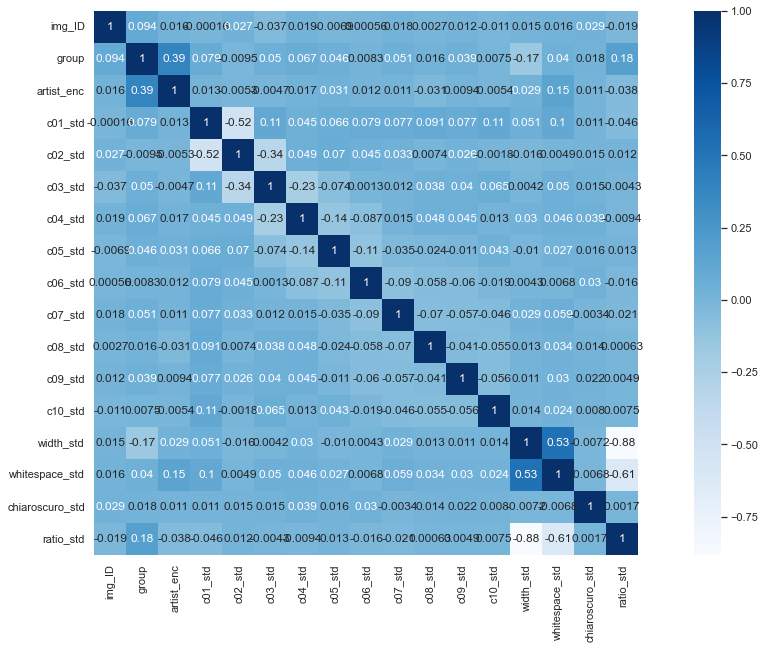

In [93]:
sns.heatmap(museum.corr(), square=True, annot=True, cmap='Blues');

There is a strong correlation between width and ratio (~~how unexpected!~~) so I'll delete width

In [94]:
# Drop original colums
museum.drop(labels='width_std', axis=1, inplace=True)

# Show result
museum

img_ID  group  artist_enc   c01_std   c02_std   c03_std  \
0     9223372032559824886      0           0 -0.269827  1.253885 -0.914169   
1                  186636      0           0 -0.577821 -1.430530  1.298972   
2                  186724      0           0 -1.399139  0.665870 -0.757947   
3                  186639      0           0 -0.834483  0.486909 -1.304723   
4                  186671      0           0 -0.834483 -0.203369  1.116713   
...                   ...    ...         ...       ...       ...       ...   
5010               229373      1          14  0.038167 -0.203369  1.429157   
5011               229381      1          14 -0.654820 -1.430530  0.387679   
5012               229388      1          14 -0.860149  0.819265 -0.159097   
5013               229396      1          14  1.013481  1.432846 -1.304723   
5014               229403      1          14 -1.399139  1.356148  0.491827   

       c04_std   c05_std   c06_std   c07_std   c08_std   c09_std   c10_std  \
0    -0.094403 -1.357002  0.366416  0.645137  1.453998  1.282414 -1.671467   
1    -0.825086  1.441691 -1.491453 -0.383183  0.437774  0.643134 -1.085797   
2     1.419154 -0.063267 -0.818312  1.429908 -0.303794  0.476366 -1.671467   
3     1.236484 -1.383405  0.474119 -0.707916 -0.908035 -0.274093 -0.332793   
4    -0.929469 -0.353697  1.335740 -1.573870 -0.276329 -0.079530 -1.504133   
...        ...       ...       ...       ...       ...       ...       ...   
5010 -0.772894 -1.515419  1.281889  1.456969  0.575102  0.226213  0.308655   
5011 -1.320907 -0.828947  0.312565 -1.222076 -0.660846 -1.385884 -1.504133   
5012  1.419154  1.230468 -0.360576 -1.573870  0.053257 -0.857783 -1.113686   
5013 -0.094403  0.966441 -0.333650 -0.870282 -0.908035  0.865493  1.284771   
5014  0.636280 -0.934558 -0.199022 -0.112572 -1.457345  1.143440 -1.057908   

      whitespace_std  chiaroscuro_std  ratio_std  
0          -0.566181        -0.079458   0.339664  
1          -0.327627        -0.078750  -0.035995  
2          -1.138712        -0.078456   1.147722  
3           0.292615        -0.077041  -0.915066  
4           0.244904        -0.078040  -0.804771  
...              ...              ...        ...  
5010        1.676231         0.054463  -0.065308  
5011        0.244904        -0.012068  -0.832727  
5012       -0.232205        -0.073802  -0.155172  
5013       -1.138712        -0.069388   1.124068  
5014       -0.852446        -0.076890   0.722190  

[4283 rows x 16 columns]

In [98]:
# Reorder columns
museum = museum[['img_ID', 'artist_enc', 'group', 'whitespace_std', 
                 'chiaroscuro_std', 'ratio_std', 'c01_std', 'c02_std',
                 'c03_std', 'c04_std', 'c05_std', 'c06_std', 'c07_std',
                 'c08_std', 'c09_std', 'c10_std']]

museum

img_ID  artist_enc  group  whitespace_std  chiaroscuro_std  \
0     9223372032559824886           0      0       -0.566181        -0.079458   
1                  186636           0      0       -0.327627        -0.078750   
2                  186724           0      0       -1.138712        -0.078456   
3                  186639           0      0        0.292615        -0.077041   
4                  186671           0      0        0.244904        -0.078040   
...                   ...         ...    ...             ...              ...   
5010               229373          14      1        1.676231         0.054463   
5011               229381          14      1        0.244904        -0.012068   
5012               229388          14      1       -0.232205        -0.073802   
5013               229396          14      1       -1.138712        -0.069388   
5014               229403          14      1       -0.852446        -0.076890   

      ratio_std   c01_std   c02_std   c03_std   c04_std   c05_std   c06_std  \
0      0.339664 -0.269827  1.253885 -0.914169 -0.094403 -1.357002  0.366416   
1     -0.035995 -0.577821 -1.430530  1.298972 -0.825086  1.441691 -1.491453   
2      1.147722 -1.399139  0.665870 -0.757947  1.419154 -0.063267 -0.818312   
3     -0.915066 -0.834483  0.486909 -1.304723  1.236484 -1.383405  0.474119   
4     -0.804771 -0.834483 -0.203369  1.116713 -0.929469 -0.353697  1.335740   
...         ...       ...       ...       ...       ...       ...       ...   
5010  -0.065308  0.038167 -0.203369  1.429157 -0.772894 -1.515419  1.281889   
5011  -0.832727 -0.654820 -1.430530  0.387679 -1.320907 -0.828947  0.312565   
5012  -0.155172 -0.860149  0.819265 -0.159097  1.419154  1.230468 -0.360576   
5013   1.124068  1.013481  1.432846 -1.304723 -0.094403  0.966441 -0.333650   
5014   0.722190 -1.399139  1.356148  0.491827  0.636280 -0.934558 -0.199022   

       c07_std   c08_std   c09_std   c10_std  
0     0.645137  1.453998  1.282414 -1.671467  
1    -0.383183  0.437774  0.643134 -1.085797  
2     1.429908 -0.303794  0.476366 -1.671467  
3    -0.707916 -0.908035 -0.274093 -0.332793  
4    -1.573870 -0.276329 -0.079530 -1.504133  
...        ...       ...       ...       ...  
5010  1.456969  0.575102  0.226213  0.308655  
5011 -1.222076 -0.660846 -1.385884 -1.504133  
5012 -1.573870  0.053257 -0.857783 -1.113686  
5013 -0.870282 -0.908035  0.865493  1.284771  
5014 -0.112572 -1.457345  1.143440 -1.057908  

[4283 rows x 16 columns]

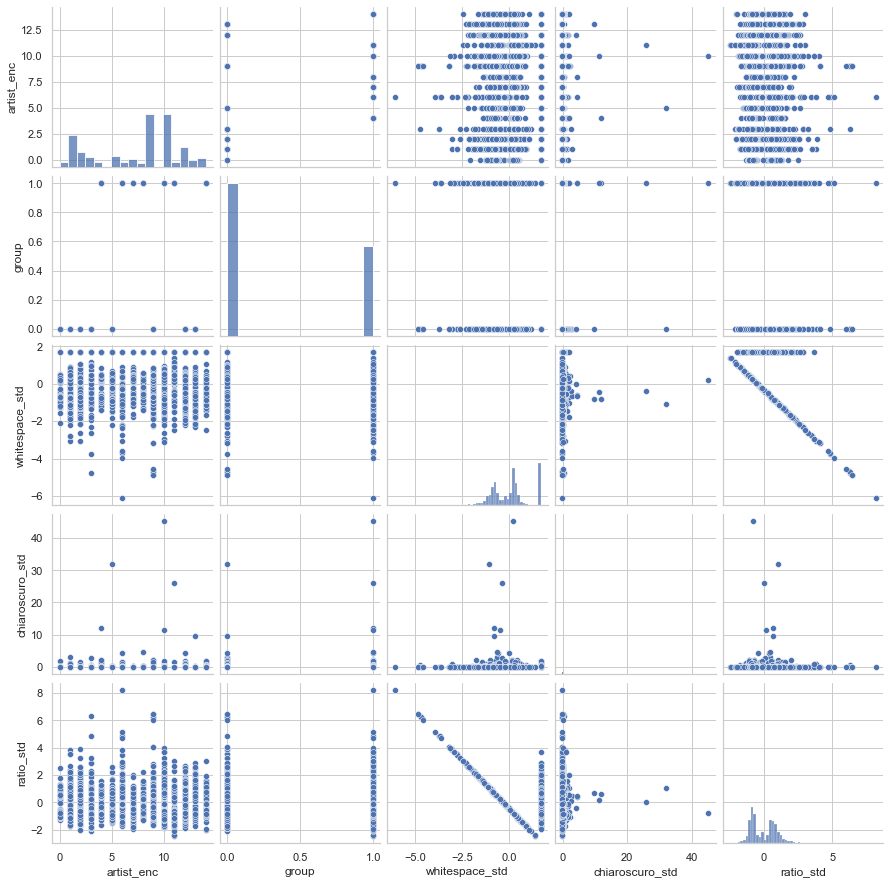

In [104]:
sns.pairplot(museum.loc[:, ['artist_enc', 'group', 'whitespace_std', 'chiaroscuro_std', 'ratio_std']])
plt.show()

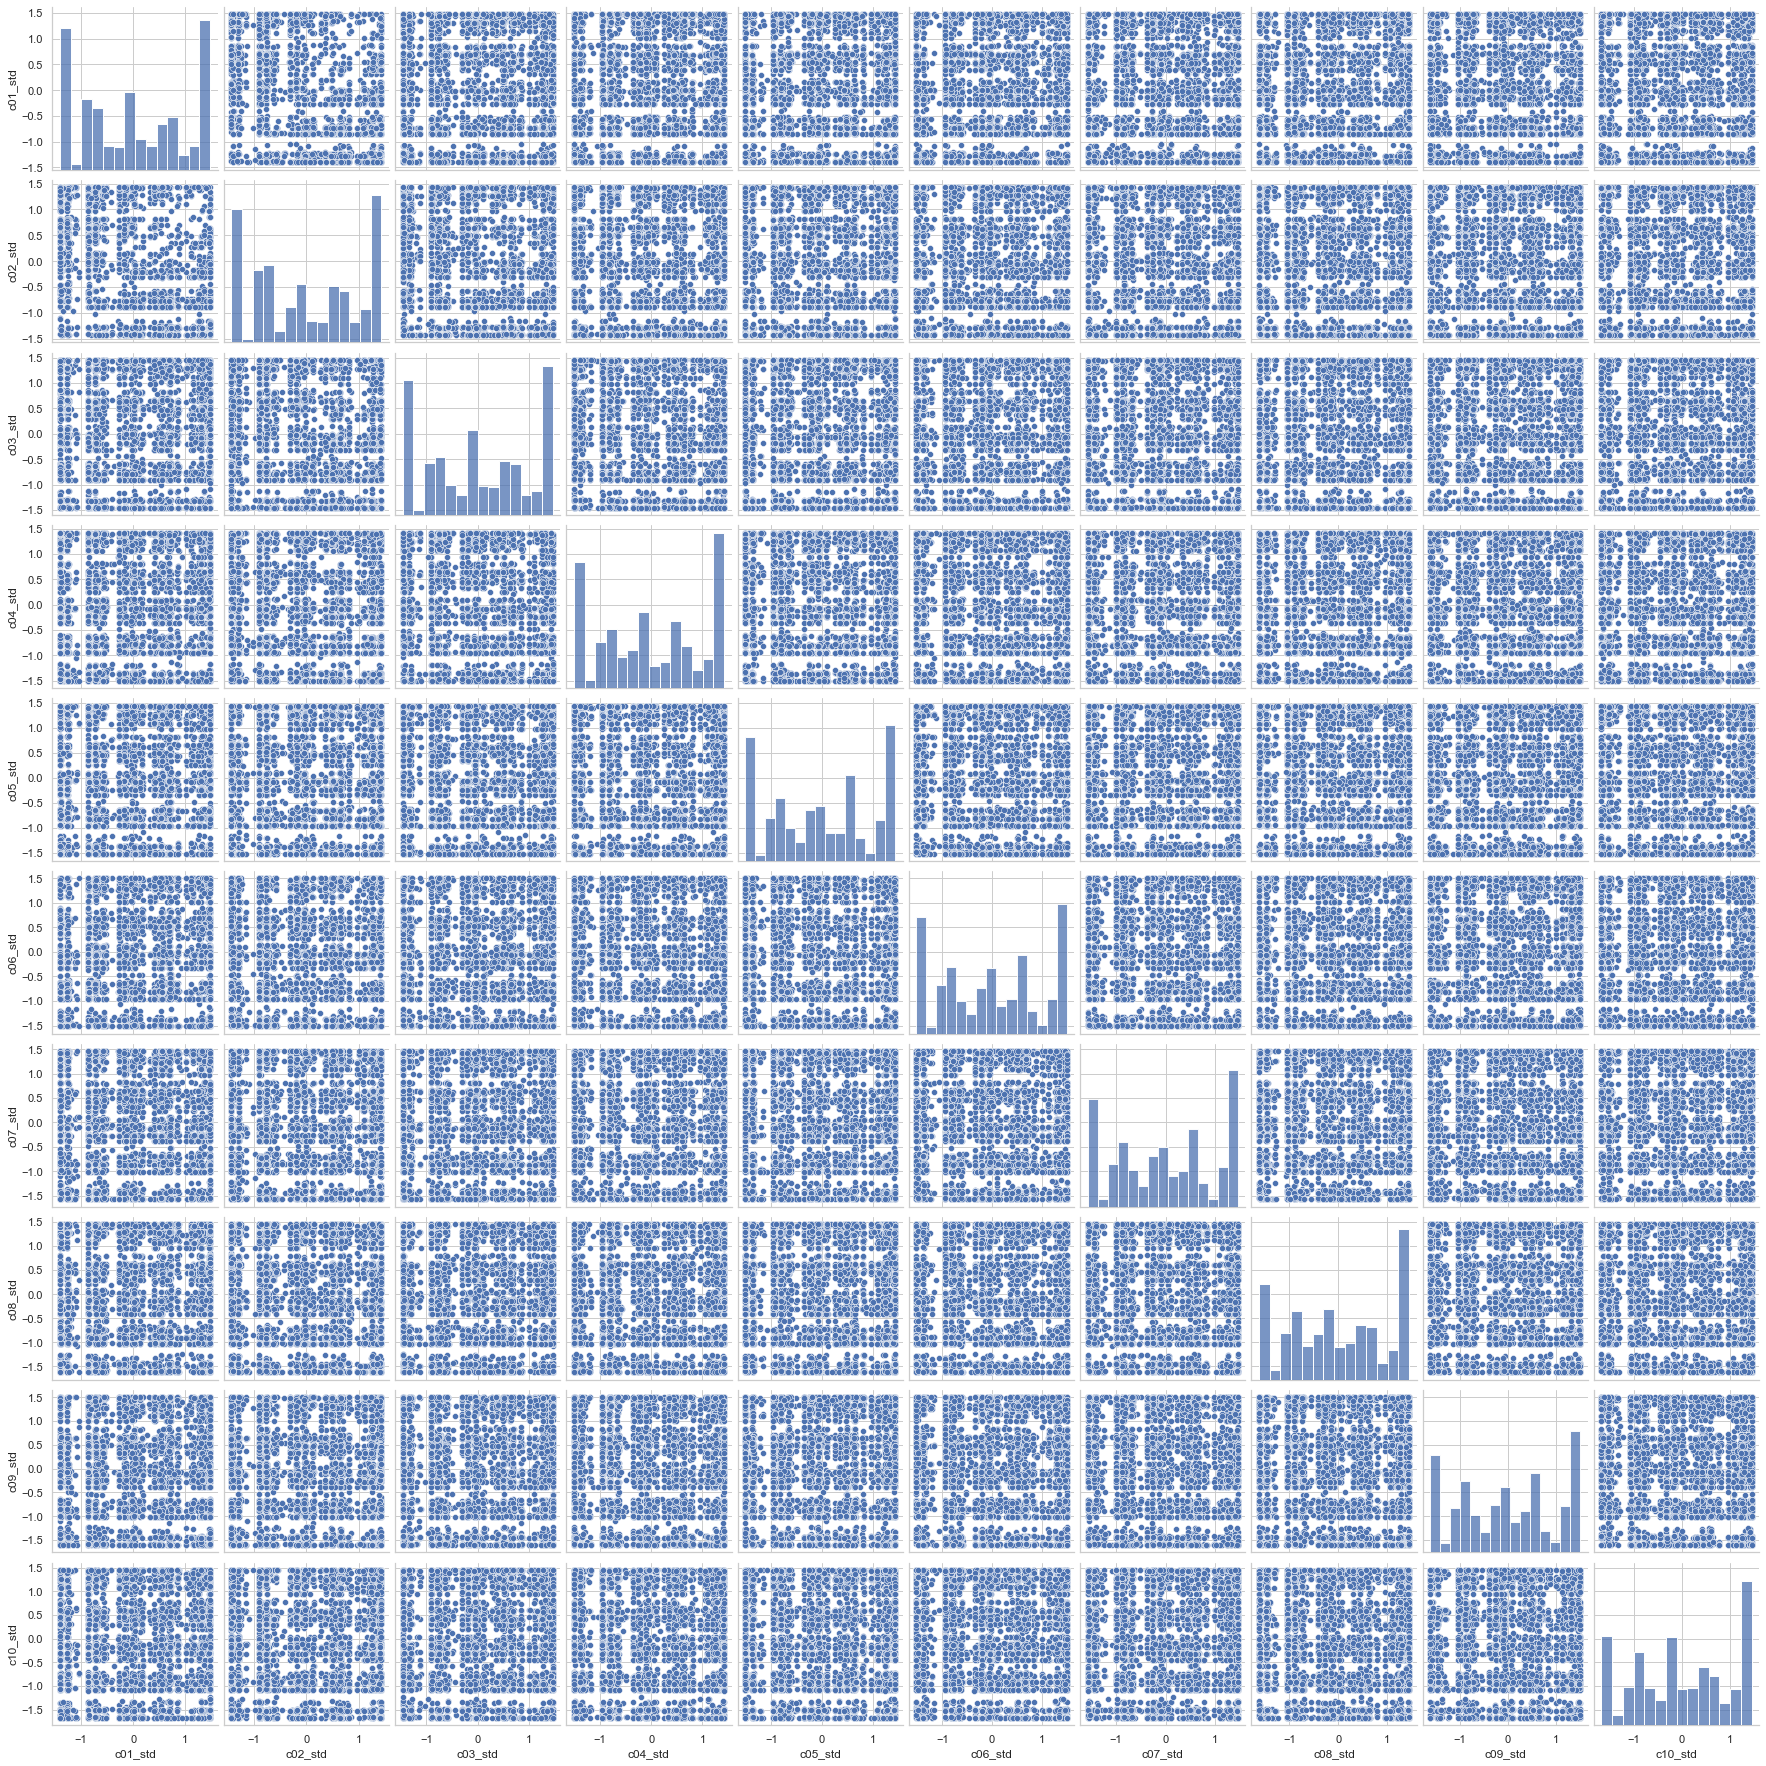

In [106]:
sns.pairplot(museum.loc[:, ['c01_std', 'c02_std', 'c03_std', 'c04_std', 'c05_std',
                            'c06_std', 'c07_std', 'c08_std', 'c09_std', 'c10_std']])
plt.show()

___
### BALANCE DATASET

I'll feed the models with the data as they are, and with balanced datasets.  
I will try two targets (artists and groups), and will use over/undersampling, so I'll be handling various versions of this museum.

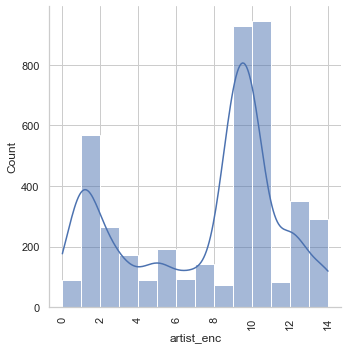

In [128]:
ax = sns.displot(museum['artist_enc'], bins=14, kde=True);
plt.xticks(rotation=90);

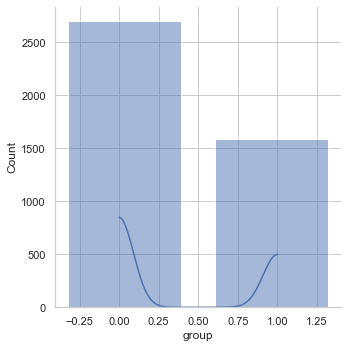

In [129]:
sns.displot(museum['group'], shrink=10, kde=True);

In [130]:
museum.groupby('group').count().iloc[:, 0]

group
0    2698
1    1585
Name: img_ID, dtype: int64

In [131]:
ideal_samples_group = museum.groupby('group').count().iloc[:, 0].sum() // museum['group'].nunique()

print(f'The ideal size of each category (target = "group") is {ideal_samples_group}')

The ideal size of each category (target = "group") is 2141


In [132]:
museum.groupby('artist_enc').count().iloc[:, 0]

artist_enc
0      88
1     569
2     266
3     173
4      89
5     191
6      92
7     142
8      74
9     930
10    946
11     82
12    350
13    131
14    160
Name: img_ID, dtype: int64

In [135]:
ideal_samples_artist = museum.groupby('artist_enc').count().iloc[:, 0].sum() // museum['artist_enc'].nunique()

print(f'The ideal size of each category (target = "artists") is {ideal_samples_artist}')

The ideal size of each category (target = "artists") is 285


In [136]:
# Train/test split (unbalanced)
X = museum.iloc[:, 3:]
y_artist = museum.iloc[:, 1]
y_group = museum.iloc[:, 2]

In [137]:
# Balance by undersample
undersample = RandomUnderSampler(random_state=42)

X_artist_under, y_artist_under = undersample.fit_resample(X, y_artist)
X_group_under, y_group_under = undersample.fit_resample(X, y_group)

In [138]:
# Balance by oversample
oversample = SMOTE(random_state=42)

X_artist_over, y_artist_over = oversample.fit_resample(X, y_artist)
X_group_over, y_group_over = oversample.fit_resample(X, y_group)

___
### EXPORT RESULTS

In [139]:
museum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4283 entries, 0 to 5014
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   img_ID           4283 non-null   int64  
 1   artist_enc       4283 non-null   int64  
 2   group            4283 non-null   int64  
 3   whitespace_std   4283 non-null   float64
 4   chiaroscuro_std  4283 non-null   float64
 5   ratio_std        4283 non-null   float64
 6   c01_std          4283 non-null   float64
 7   c02_std          4283 non-null   float64
 8   c03_std          4283 non-null   float64
 9   c04_std          4283 non-null   float64
 10  c05_std          4283 non-null   float64
 11  c06_std          4283 non-null   float64
 12  c07_std          4283 non-null   float64
 13  c08_std          4283 non-null   float64
 14  c09_std          4283 non-null   float64
 15  c10_std          4283 non-null   float64
dtypes: float64(13), int64(3)
memory usage: 697.9 KB


In [140]:
display('X_group_over', 'X_artist_over')

X_group_over
      whitespace_std  chiaroscuro_std  ratio_std   c01_std   c02_std  \
0          -0.566181        -0.079458   0.339664 -0.269827  1.253885   
1          -0.327627        -0.078750  -0.035995 -0.577821 -1.430530   
2          -1.138712        -0.078456   1.147722 -1.399139  0.665870   
3           0.292615        -0.077041  -0.915066 -0.834483  0.486909   
4           0.244904        -0.078040  -0.804771 -0.834483 -0.203369   
...              ...              ...        ...       ...       ...   
5391        0.244904        -0.068457  -0.816980  0.055102  1.304202   
5392        0.019632        -0.069004  -0.507693  0.547546  1.208647   
5393       -0.757025        -0.062344   0.592873 -1.399139  1.175854   
5394       -0.938580        -0.013181   0.829372  0.113865  0.319878   
5395       -0.897896        -0.078011   0.773060 -0.860149  0.599715   

       c03_std   c04_std   c05_std   c06_std   c07_std   c08_std   c09_std  \
0    -0.914169 -0.094403 -1.357002  0.366416  0.645137  1.453998  1.282414   
1     1.298972 -0.825086  1.441691 -1.491453 -0.383183  0.437774  0.643134   
2    -0.757947  1.419154 -0.063267 -0.818312  1.429908 -0.303794  0.476366   
3    -1.304723  1.236484 -1.383405  0.474119 -0.707916 -0.908035 -0.274093   
4     1.116713 -0.929469 -0.353697  1.335740 -1.573870 -0.276329 -0.079530   
...        ...       ...       ...       ...       ...       ...       ...   
5391 -1.460945  0.182943  0.465059  1.470368 -0.427238 -0.713433  1.170350   
5392  0.444711 -1.270720 -0.799545 -0.141723 -0.311221  0.356785  1.225091   
5393  1.455194  0.408021 -0.786427  1.446182  0.708460 -1.608167 -0.062563   
5394  0.294987 -1.405596  1.278768  0.688807 -1.102575  1.079587  0.159729   
5395 -1.393570 -0.757442  1.373369 -0.164823 -0.722535 -1.221874 -0.682586   

       c10_std  
0    -1.671467  
1    -1.085797  
2    -1.671467  
3    -0.332793  
4    -1.504133  
...        ...  
5391 -0.503967  
5392 -1.644292  
5393  0.531696  
5394  1.428976  
5395 -1.485498  

[5396 rows x 13 columns]

X_artist_over
       whitespace_std  chiaroscuro_std  ratio_std   c01_std   c02_std  \
0           -0.566181        -0.079458   0.339664 -0.269827  1.253885   
1           -0.327627        -0.078750  -0.035995 -0.577821 -1.430530   
2           -1.138712        -0.078456   1.147722 -1.399139  0.665870   
3            0.292615        -0.077041  -0.915066 -0.834483  0.486909   
4            0.244904        -0.078040  -0.804771 -0.834483 -0.203369   
...               ...              ...        ...       ...       ...   
14185       -0.924312        -0.065792   0.823187  0.929717 -0.217382   
14186       -0.695060        -0.036647   0.481377  1.142500  1.042041   
14187        1.676231        -0.078153  -0.155909 -1.225441  0.394732   
14188       -0.547436        -0.079377   0.270614 -0.860149  1.231787   
14189        1.676231        -0.078933  -0.146471 -1.043129  1.309501   

        c03_std   c04_std   c05_std   c06_std   c07_std   c08_std   c09_std  \
0     -0.914169 -0.094403 -1.357002  0.366416  0.645137  1.453998  1.282414   
1      1.298972 -0.825086  1.441691 -1.491453 -0.383183  0.437774  0.643134   
2     -0.757947  1.419154 -0.063267 -0.818312  1.429908 -0.303794  0.476366   
3     -1.304723  1.236484 -1.383405  0.474119 -0.707916 -0.908035 -0.274093   
4      1.116713 -0.929469 -0.353697  1.335740 -1.573870 -0.276329 -0.079530   
...         ...       ...       ...       ...       ...       ...       ...   
14185  1.122705 -1.439921  1.244498  0.799930  0.568710 -1.268994  1.374055   
14186 -0.467488  1.287321 -1.265466  1.182567  0.932256 -0.266651  0.085052   
14187 -1.456622  1.166096  0.854590  1.263219 -0.348141 -1.222226 -1.019014   
14188 -0.712936  1.368452 -1.471850  0.344881 -0.182744  1.406518 -0.620916   
14189 -1.113732 -0.404743  0.254948 -0.902817  0.103251 -0.668198  0.857453   

        c10_std  
0     -1.671467  
1     -1.085797  
2     -1.671467  
3     -0.332793  
4     -1.504133  
...   

In [141]:
display('X_group_under', 'X_artist_under')

X_group_under
      whitespace_std  chiaroscuro_std  ratio_std   c01_std   c02_std  \
0          -0.709314        -0.073035   0.524424 -0.860149  0.512475   
1           0.674302        -0.078593  -1.422978 -1.399139  1.432846   
2          -0.232205        -0.018733  -0.133250  0.423159  0.512475   
3           0.340326        -0.079455  -0.937385 -1.399139  1.228319   
4           0.244904        -0.078034  -0.823493 -1.399139 -0.049974   
...              ...              ...        ...       ...       ...   
3165        1.676231         0.054463  -0.065308  0.038167 -0.203369   
3166        0.244904        -0.012068  -0.832727 -0.654820 -1.430530   
3167       -0.232205        -0.073802  -0.155172 -0.860149  0.819265   
3168       -1.138712        -0.069388   1.124068  1.013481  1.432846   
3169       -0.852446        -0.076890   0.722190 -1.399139  1.356148   

       c03_std   c04_std   c05_std   c06_std   c07_std   c08_std   c09_std  \
0    -0.185134  1.053813 -0.802544 -0.818312 -1.411503  0.300447  1.476978   
1    -0.757947  0.453609 -0.221683 -0.952940 -0.274939 -0.193932  0.670929   
2    -0.914169  1.053813 -0.828947 -0.791387  1.294603  0.300447  0.254008   
3    -0.914169  0.427513 -0.828947 -0.225948  1.429908 -0.880570 -0.246298   
4     1.116713 -0.955565 -0.089670  0.285639  0.645137  1.096946 -0.691014   
...        ...       ...       ...       ...       ...       ...       ...   
3165  1.429157 -0.772894 -1.515419  1.281889  1.456969  0.575102  0.226213   
3166  0.387679 -1.320907 -0.828947  0.312565 -1.222076 -0.660846 -1.385884   
3167 -0.159097  1.419154  1.230468 -0.360576 -1.573870  0.053257 -0.857783   
3168 -1.304723 -0.094403  0.966441 -0.333650 -0.870282 -0.908035  0.865493   
3169  0.491827  0.636280 -0.934558 -0.199022 -0.112572 -1.457345  1.143440   

       c10_std  
0     1.228993  
1     1.368438  
2     1.228993  
3    -0.137570  
4    -1.532022  
...        ...  
3165  0.308655  
3166 -1.504133  
3167 -1.113686  
3168  1.284771  
3169 -1.057908  

[3170 rows x 13 columns]

X_artist_under
      whitespace_std  chiaroscuro_std  ratio_std   c01_std   c02_std  \
0          -0.947868         0.296723   0.850258 -0.860149  0.461343   
1          -0.566181        -0.079458   0.339664 -0.269827  1.253885   
2           0.244904        -0.079452  -0.856951 -0.269827  1.279451   
3          -0.804736        -0.079488   0.629516 -0.860149  0.384646   
4          -0.279916        -0.078633  -0.082607 -0.860149  1.432846   
...              ...              ...        ...       ...       ...   
1105       -0.804736        -0.075483   0.656813 -0.038832  0.538041   
1106        1.676231        -0.071170   0.602638  1.321475 -1.302701   
1107       -1.663532        -0.067917   1.912332  0.859484 -0.868081   
1108       -0.327627        -0.078722  -0.012099 -0.860149  0.972661   
1109       -1.138712        -0.073827   1.124068 -0.731818  1.330583   

       c03_std   c04_std   c05_std   c06_std   c07_std   c08_std   c09_std  \
0    -0.289282  1.393059 -1.515419 -1.518379  0.618076 -0.303794  1.282414   
1    -0.914169 -0.094403 -1.357002  0.366416  0.645137  1.453998  1.282414   
2    -0.783984  1.106005 -0.221683 -1.518379  1.456969 -0.386191 -0.996757   
3     1.455194 -1.347003 -0.828947  0.501045 -0.383183  1.289205 -0.996757   
4    -1.434908 -0.094403  1.256871 -0.818312  0.672199  1.096946 -0.857783   
...        ...       ...       ...       ...       ...       ...       ...   
1105  1.090676 -1.503577 -0.221683 -0.602907 -1.438564 -0.413656  0.476366   
1106 -0.185134  1.419154 -0.802544 -1.383751  0.482771 -1.622138  0.670929   
1107  0.413716  1.288675 -1.515419  0.339491 -0.978526  1.453998  0.837698   
1108 -0.185134  1.079909 -0.960961  1.039558 -1.005587  0.849757  1.504772   
1109  1.012566  1.393059 -1.515419 -0.764461  1.105176  0.300447  1.421388   

       c10_std  
0    -0.165459  
1    -1.671467  
2    -0.137570  
3    -0.304904  
4    -0.332793  
...        ...  
1105  0.754879  


In [142]:
y_artist_over

0         0
1         0
2         0
3         0
4         0
         ..
14185    14
14186    14
14187    14
14188    14
14189    14
Name: artist_enc, Length: 14190, dtype: int64

In [143]:
y_group_over

0       0
1       0
2       0
3       0
4       0
       ..
5391    1
5392    1
5393    1
5394    1
5395    1
Name: group, Length: 5396, dtype: int64

In [144]:
y_artist_under

0        0
1        0
2        0
3        0
4        0
        ..
1105    14
1106    14
1107    14
1108    14
1109    14
Name: artist_enc, Length: 1110, dtype: int64

In [145]:
y_group_under

0       0
1       0
2       0
3       0
4       0
       ..
3165    1
3166    1
3167    1
3168    1
3169    1
Name: group, Length: 3170, dtype: int64

In [146]:
with open('./data/clean_data', 'wb') as file:
    pickle.dump(museum, file)
    pickle.dump(X, file)
    pickle.dump(y_artist, file)
    pickle.dump(y_group, file)
    pickle.dump(X_artist_over, file)
    pickle.dump(y_artist_over, file)
    pickle.dump(X_group_over, file)
    pickle.dump(y_group_over, file)
    pickle.dump(X_artist_under, file)
    pickle.dump(y_artist_under, file)
    pickle.dump(X_group_under, file)
    pickle.dump(y_group_under, file)